#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing


###Traning Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


###validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#Building Model

In [8]:
with tf.device('/device:GPU:0'):
     cnn = tf.keras.models.Sequential()
     ###Building Convolution Layer
     cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
     cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
     cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     cnn.add(tf.keras.layers.Dropout(0.25))
     
     cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
     cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
     cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     cnn.add(tf.keras.layers.Dropout(0.25))

     cnn.add(tf.keras.layers.Flatten())
     cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
     cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
     
     cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
     
     #Outer Layer
     cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))
     
     ##Compiling and Training Phase
     cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
     cnn.summary()
     training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=33)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

Saving Model

In [9]:
cnn.save('trained_model.h5')

In [10]:
training_history.history #returning dictionary of loss and accuracy

{'loss': [8.183857917785645,
  3.581143617630005,
  3.5754687786102295,
  3.519338846206665,
  3.427638053894043,
  3.2088623046875,
  3.0640757083892822,
  2.8177592754364014,
  2.641040802001953,
  2.4212186336517334,
  2.1371777057647705,
  1.931127905845642,
  1.6996527910232544,
  1.5701760053634644,
  1.355178713798523,
  1.1884583234786987,
  1.0406465530395508,
  1.0215719938278198,
  0.8602306246757507,
  0.8754501342773438,
  0.719231367111206,
  0.6650938391685486,
  0.6023935079574585,
  0.5628127455711365,
  0.4849149286746979,
  0.6034672856330872,
  0.4885517954826355,
  0.4920404553413391,
  0.4284043610095978,
  0.4174235761165619,
  0.3609306812286377,
  0.32240599393844604,
  0.3951953649520874],
 'accuracy': [0.026324236765503883,
  0.03338683769106865,
  0.0394863560795784,
  0.055537719279527664,
  0.07672552019357681,
  0.1126805767416954,
  0.13001605868339539,
  0.18908506631851196,
  0.25521668791770935,
  0.3130016028881073,
  0.39004814624786377,
  0.4478330

In [11]:
#Recoding the training history
import json
with open('training_history.json','w') as f:
    json.dump(str(training_history.history),f)

Calculating Accuracy of Model achieved on validation data

In [12]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
print("Validation set Accuracy {}% ".format(training_history.history['val_accuracy'][-1] * 100)) #returning the last validation accuracy

Validation set Accuracy 93.16239356994629% 


Accuracy visualization

Training Visualization


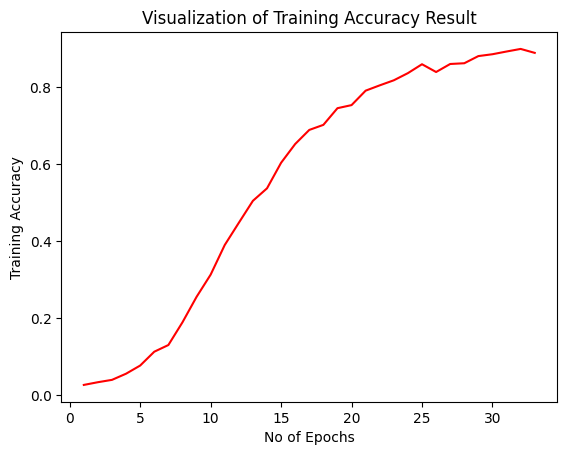

In [15]:
epochs = [i for i in range(1,34)]
plt.plot(epochs,training_history.history['accuracy'], color="red")
plt.title('Visualization of Training Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.show()

Validation Accuracy Visualization

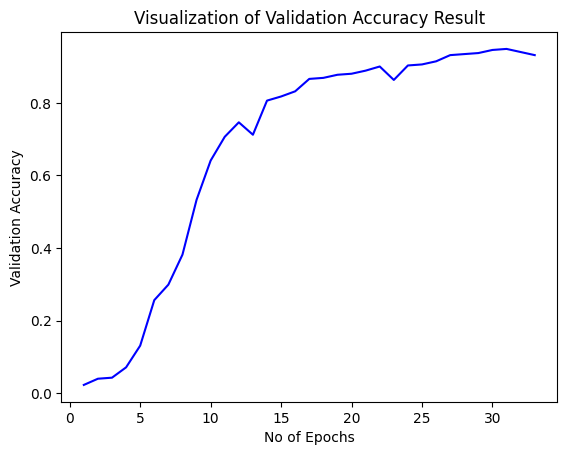

In [16]:
plt.plot(epochs,training_history.history['val_accuracy'], color="blue")
plt.title('Visualization of Validation Accuracy Result')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

Evaluating CNN Model

In [17]:
tarining_loss, training_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 13s 125ms/step - loss: 0.1062 - accuracy: 0.9701


In [18]:
validation_loss, validation_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 2s 30ms/step - loss: 0.3336 - accuracy: 0.9316


Test Set Evaluation

In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'fruit-and-vegetable-image-recognition/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [20]:
test_loss, test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 3s 80ms/step - loss: 0.3262 - accuracy: 0.9331
